# House Price Prediction using Machine Learning

This project aims to predict the price of houses based on features such as area, number of bedrooms, bathrooms, and location.  

## Why this project?
- Helps buyers/sellers estimate house prices.
- Useful for real estate companies to make data-driven decisions.
- Shows how machine learning can solve real-world business problems.


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [30]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [31]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0,})

In [32]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


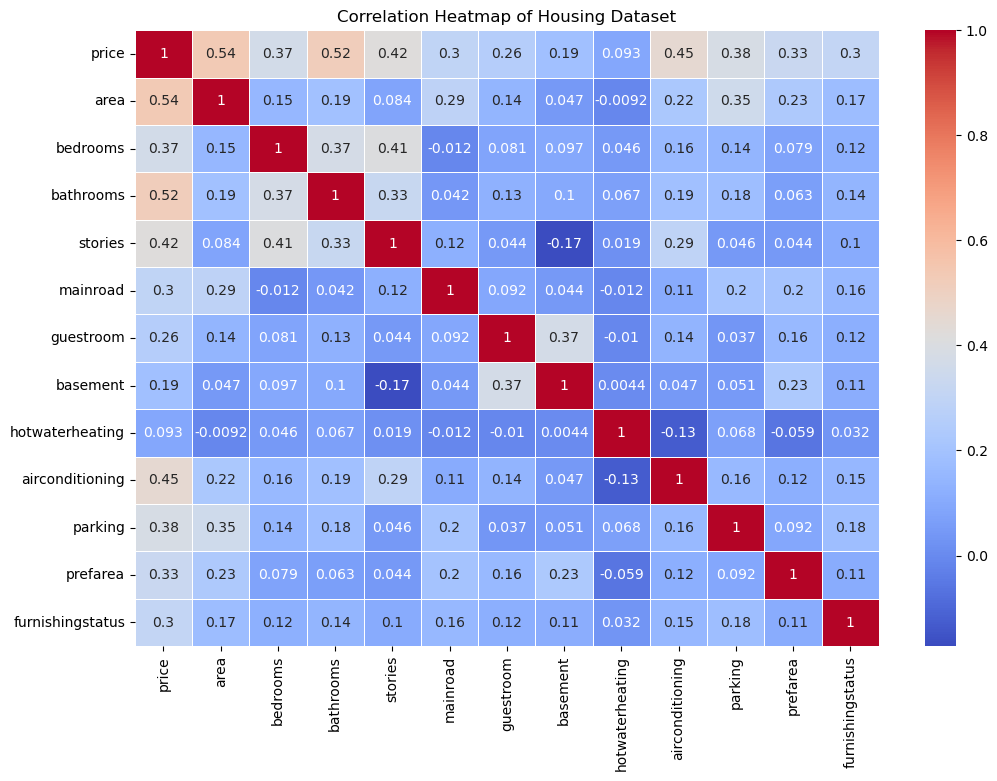

In [33]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Housing Dataset")
plt.show()

Strongest correlations with price:
1]Area (0.54) → Bigger area = higher price (makes sense),
2]Bathrooms (0.52) → More bathrooms = higher price,
3]Airconditioning (0.45) → Houses with AC are priced higher,
4]Stories (0.42) → More stories slightly increases price,
5]Bedrooms (0.37) → More bedrooms = higher price (moderate),
6]Parking (0.38) → More parking = higher price,

Moderate correlations:
1]Prefarea (0.33) → Houses in preferred areas have higher prices,
2]Mainroad (0.30) → Location on the main road increases price,

Weak or no correlation:
1]Basement (0.19) → Small effect,
2]Guestroom (0.26) → Small effect,
3]Hotwaterheating (-0.093)

<Axes: xlabel='price', ylabel='Count'>

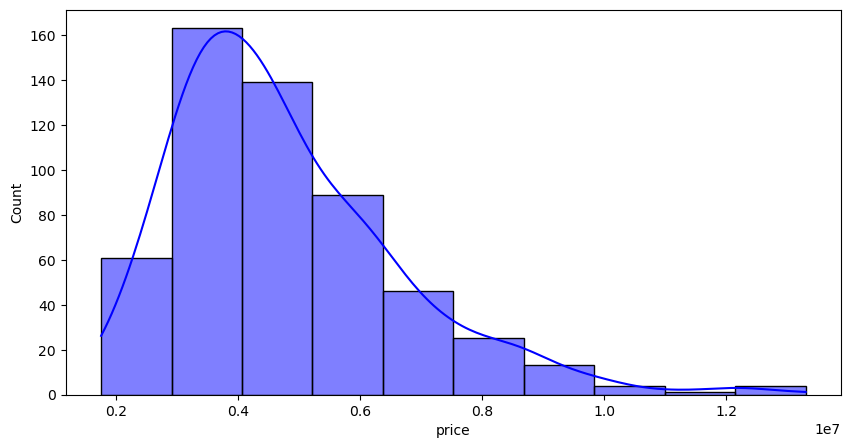

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=10, kde=True, color='blue')

In [35]:
# Features (all columns except price)
X = df.drop("price", axis=1)

# Target (price)
y = df["price"]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
model=LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Intercept: -377147.9908875311
Coefficients: [2.54217740e+02 1.25123338e+05 1.01338998e+06 4.50895581e+05
 4.28196410e+05 3.00764961e+05 4.56245787e+05 8.69502712e+05
 8.79973330e+05 2.58671739e+05 4.90040767e+05 1.67605725e+05]
MSE: 1146161440451.2576
R² Score: 0.6617457048494306


In [41]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [42]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [43]:
# Evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)


In [44]:
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

MSE: 1138786662416.2964
R² Score: 0.6639221437506779


In [45]:
model.predict([[7500,4,2,2,1,0,1,0,1,3,1,2]])	

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8324232.48948175])

In [130]:
#'guestroom','basement','hotwaterheating'

In [26]:
model.predict([[3850,3,1,2,1,0,0,0,0,0,0,0]])	

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3326790.84201126])

In [27]:
model.predict([[2910,3,1,1,0,0,0,0,0,0,0,2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2559907.29213385])

### Results
- Random Forest performed best with the highest accuracy (R² Score).  
- Linear Regression was good as a baseline but less accurate.  

### Conclusion
- Machine learning can be used to estimate house prices based on features.  
- Random Forest is the best model for this dataset.  
- In the future, this project can be improved by adding more features like:
  - Nearby amenities (schools, hospitals, transport)
  - Crime rate
  - Market trends  
